In [1]:
import os
import glob
import imageio
import scipy.io
from skimage import feature
from skimage.color import rgb2gray
from skimage.filters import gaussian
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


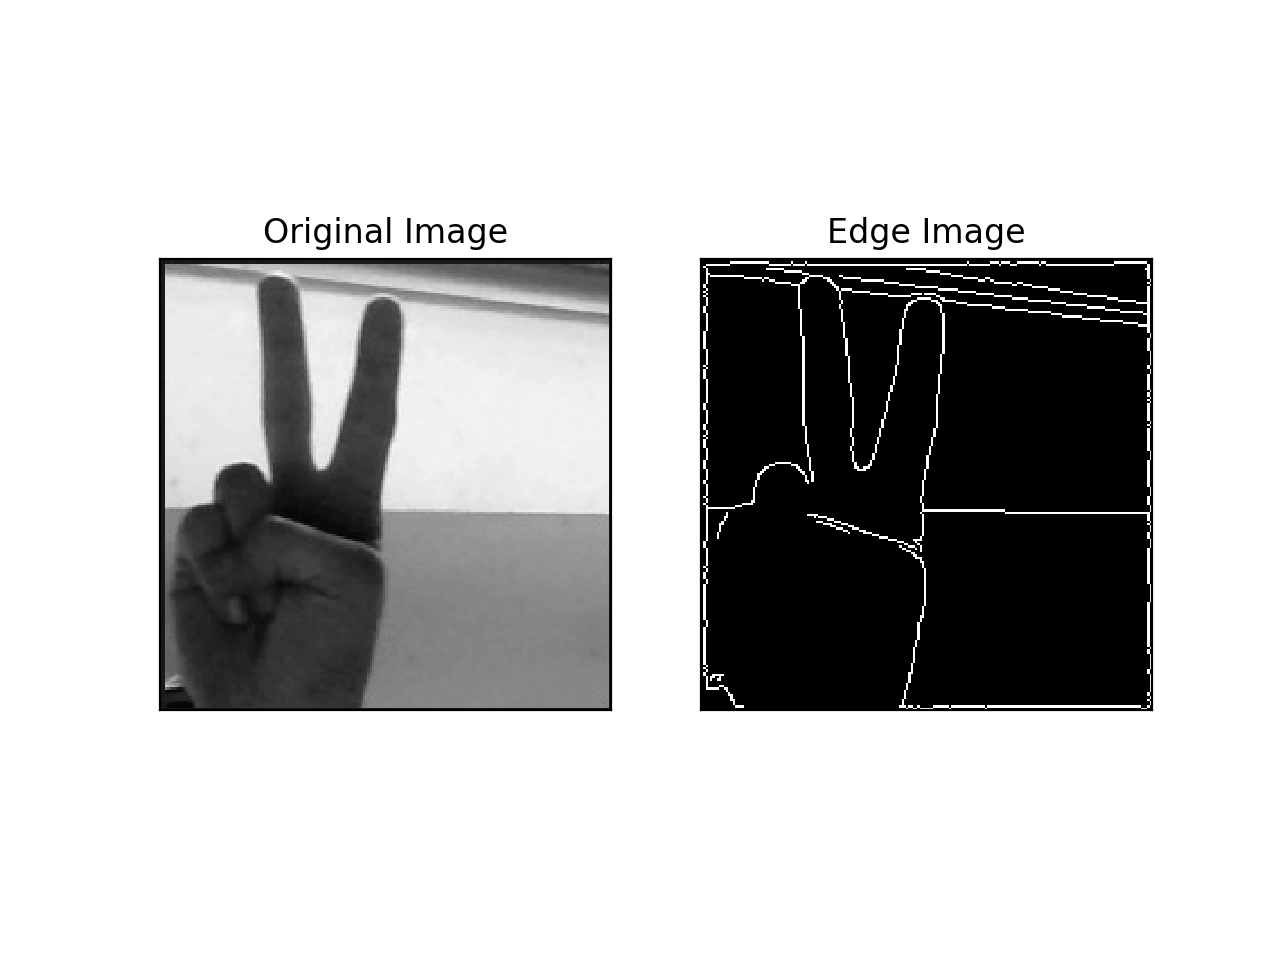

In [2]:
img = cv2.imread('V1.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [3]:
img1000 = cv2.imread('V1000.jpg',0)
ret,thresh = cv2.threshold(img1000,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
hull = cv2.convexHull(cnt)
print(hull)

[[[  3 188]]

 [[  4 189]]

 [[  2 189]]

 [[  2 188]]]


In [4]:
im
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-4jcifzim/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [3]:
# play around with black and white images
## mean-centering
## overlaying edges
## 